In [58]:
import sklearn
import pandas as pd
import seaborn as sns
import math
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn import decomposition
from matplotlib import pyplot as plt
from numpy import mean
from numpy import std
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split


column_names = ['ID number','diagnosis', 'mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean smoothness', 'mean compactness','mean concavity','mean concave points','mean symmetry','mean fractal dimension', 'standard error radius', 'standard error texture', 'standard error perimeter', 'standard error area', 'standard error smoothness', 'standard error compactness','standard error concavity','standard error concave points','standard error symmetry','standard error fractal dimension','worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness','worst concavity','worst concave points','worst symmetry','worst fractal dimension']

wc = pd.read_csv('data/wdbc.data', names = column_names) 
wc = wc.drop("ID number", axis = 1) #an ID number is not going to assist the models predictions, and it does not assist me in any way
attribute_names = wc.columns.values[1:]
wc.info()









<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   diagnosis                         569 non-null    object 
 1   mean radius                       569 non-null    float64
 2   mean texture                      569 non-null    float64
 3   mean perimeter                    569 non-null    float64
 4   mean area                         569 non-null    float64
 5   mean smoothness                   569 non-null    float64
 6   mean compactness                  569 non-null    float64
 7   mean concavity                    569 non-null    float64
 8   mean concave points               569 non-null    float64
 9   mean symmetry                     569 non-null    float64
 10  mean fractal dimension            569 non-null    float64
 11  standard error radius             569 non-null    float64
 12  standard

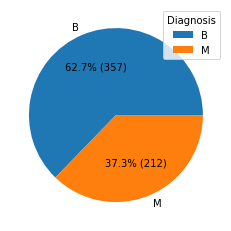

In [61]:
#From the guidlines about imbalance, the dataset is just midly imbalanced. How much of an issue this is depends on the dataset
#We can try and deal with this with not placing a high emphasis on the accuracy of the model.
#If the model is not performing as expected then we can try either downsampling the majority class or up-weighting the majority class

import matplotlib.pyplot as plt
counts = wc['diagnosis'].value_counts()
plt.pie(counts, labels = counts.index, autopct=lambda pct: f"{pct:.1f}% ({pct* sum(counts)/100:.0f})")
plt.legend(title="Diagnosis")
plt.savefig('label_distribution.png', bbox_inches='tight')
plt.show()

#help from here for piechart https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct

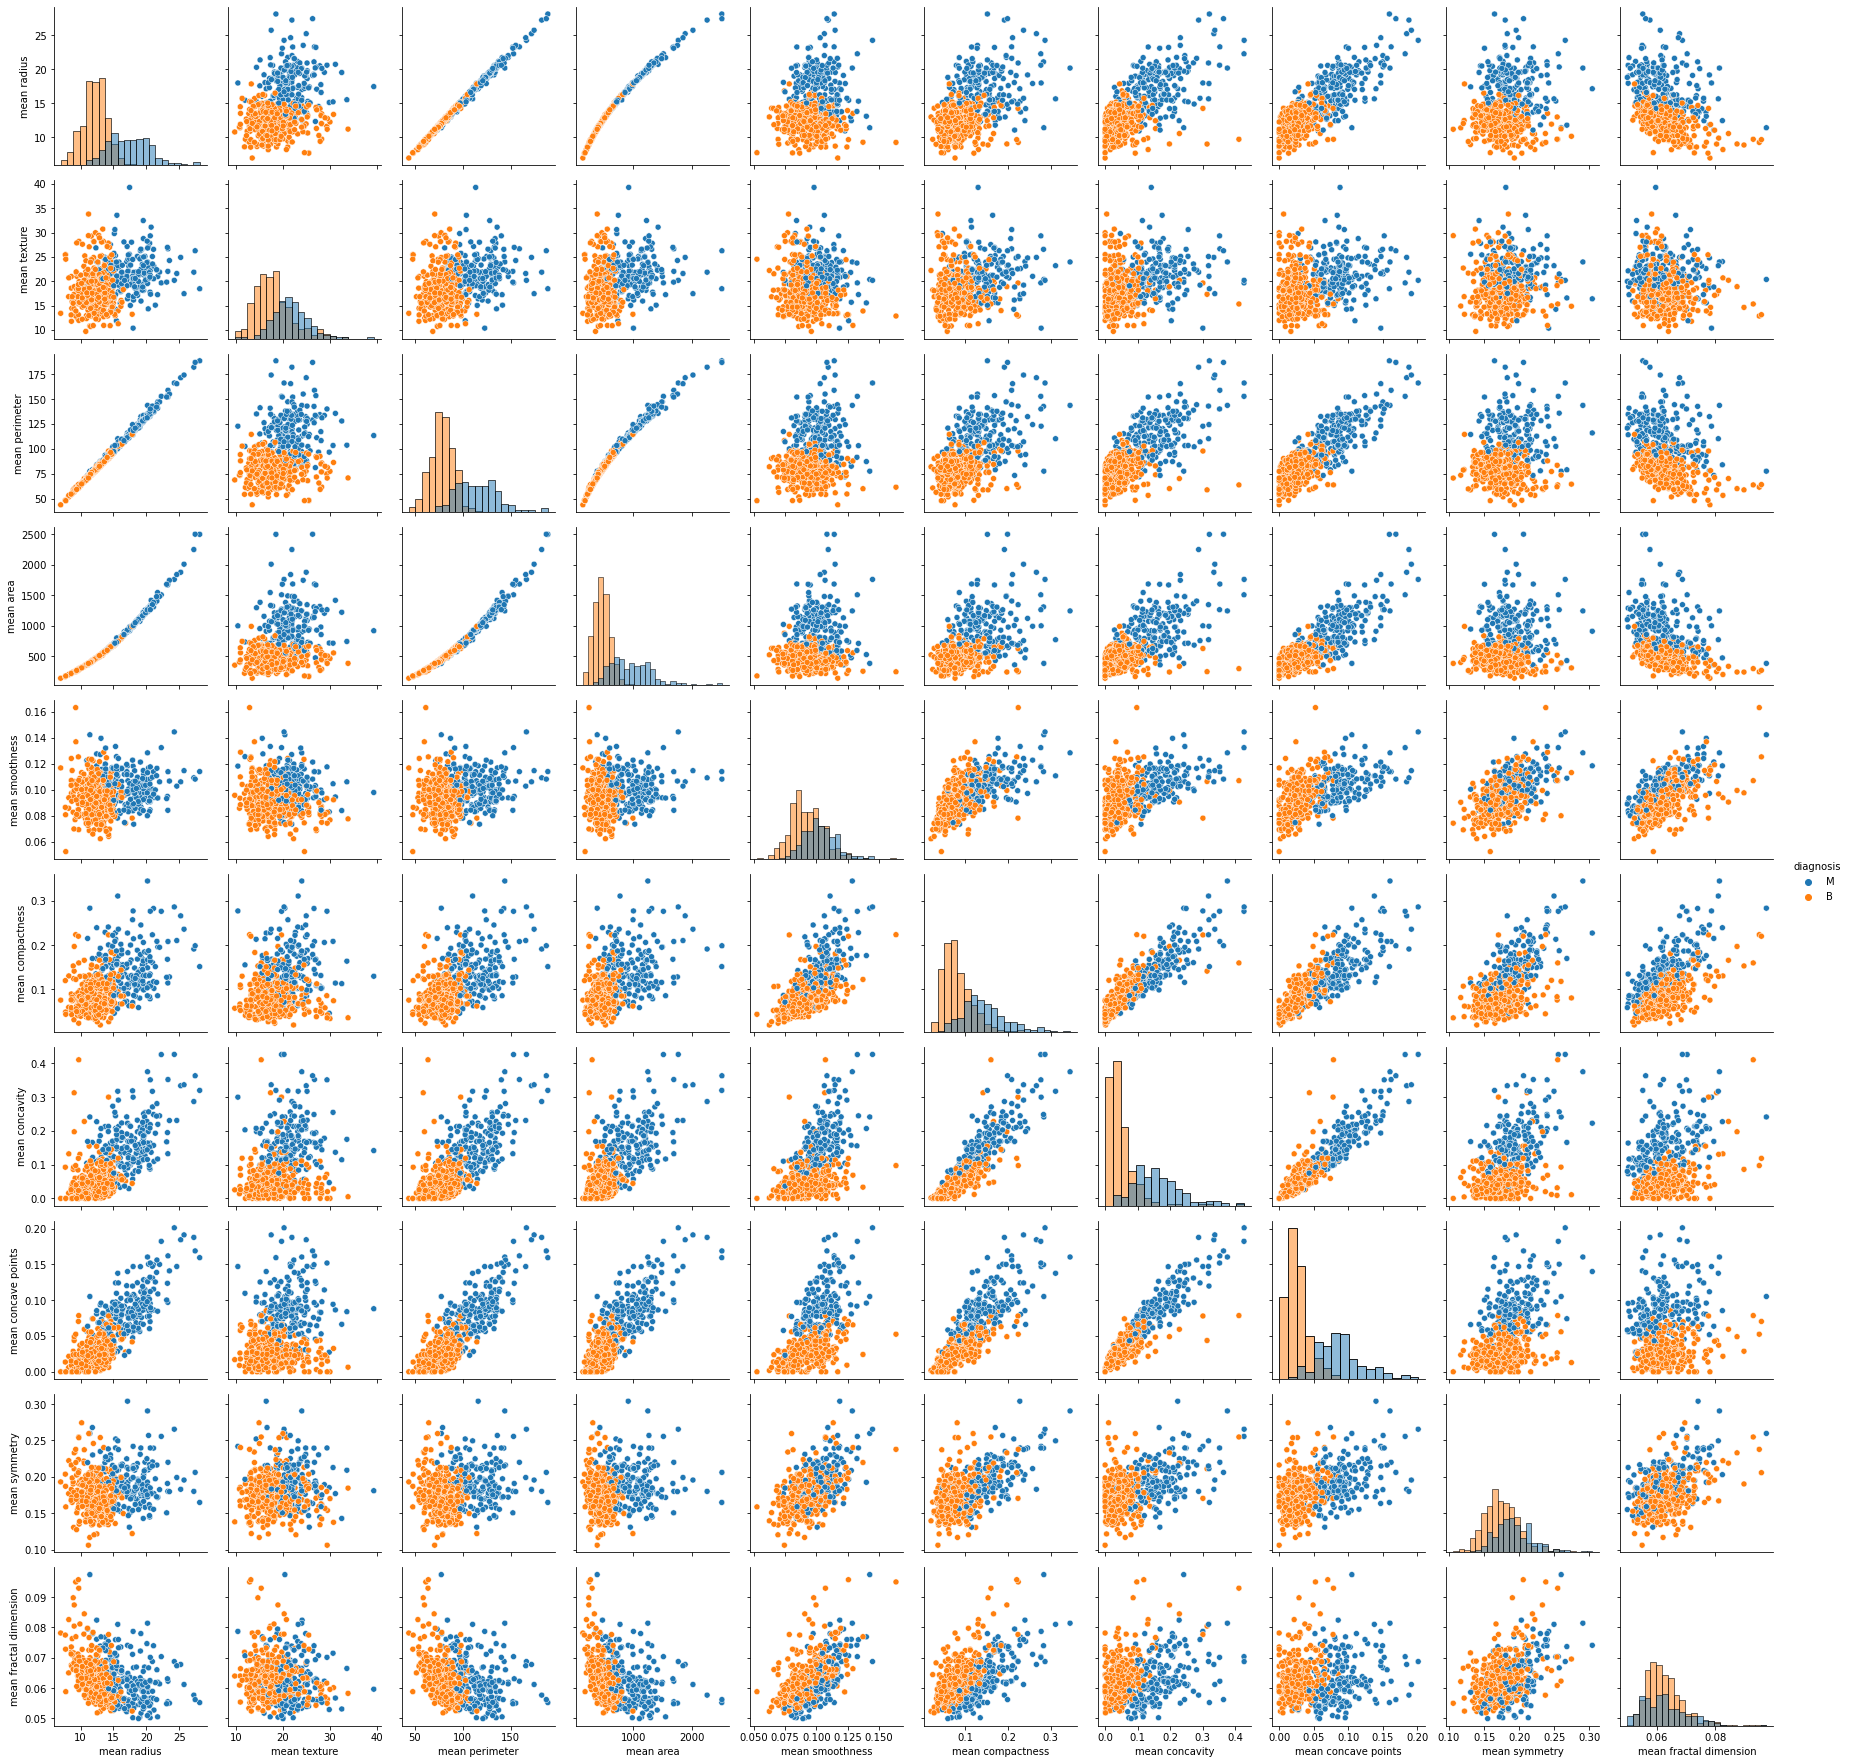

In [123]:
mean_df = wc[[col for col in wc.columns if "mean" in col or "diagnosis" in col]]
stand_df = wc[[col for col in wc.columns if "standard" in col or "diagnosis" in col]]
worst_df = wc[[col for col in wc.columns if "worst" in col or "diagnosis" in col]]
g = sns.PairGrid(mean_df, hue = "diagnosis")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

900
435.0


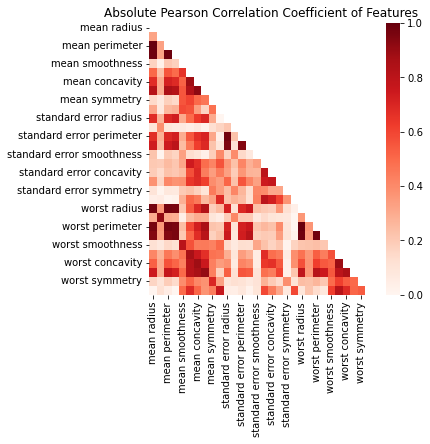

In [189]:
corr1 = wc.corr(method = 'pearson')
lenger = corr.size
print(lenger)
lenger -= 30
lenger /= 2
print(lenger)


f,ax = plt.subplots(figsize=(5,5))

mask = np.triu(np.ones_like(corr))
sns.heatmap(corr1.abs(), mask = mask, ax=ax, vmin=0, vmax=1, cmap="Reds")
ax.set_title('Absolute Pearson Correlation Coefficient of Features')
plt.savefig('heatmap.pdf', bbox_inches='tight')
#can see there is high correlation between variables relating to size, including perimeter, radius and area.
#Very strong correlations for mean, standard error and worst between themselves
#Very strong correlation between mean and worst for size related attributes
#Strong Correlation between Standard Error with mean and worst for size related attributes

#https://seaborn.pydata.org/examples/many_pairwise_correlations.html

In [ ]:
#distribution of 'mean' attributes
import matplotlib.pyplot as plt
benign_df = mean_df[mean_df["diagnosis"] == "B"]

malignant_df = mean_df[mean_df["diagnosis"] == "M"]

for attribute in benign_df.columns[1:]:
    fig, ax = plt.subplots()
    sns.histplot(benign_df.loc[:, attribute], ax=ax, color="skyblue")
    sns.histplot(malignant_df.loc[:, attribute], ax=ax, color="red")
#symmetry and fractal dimension distributions are similar implying they may not be so useful as features

In [ ]:
wc['diagnosis'].replace(['B', 'M'],[0, 1], inplace=True)
#replace categorical column to be numerical


training_data, testing_data = train_test_split(wc, test_size=0.2, random_state=1, stratify = wc['diagnosis'], shuffle = True)

training_data = training_data.reset_index()
testing_data = testing_data.reset_index()

X = pd.DataFrame(training_data[attribute_names])
y = pd.DataFrame(training_data["diagnosis"])

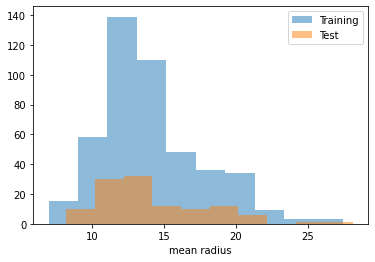

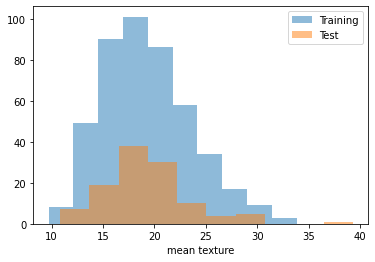

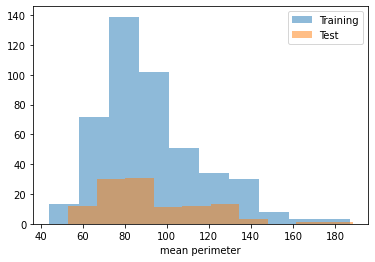

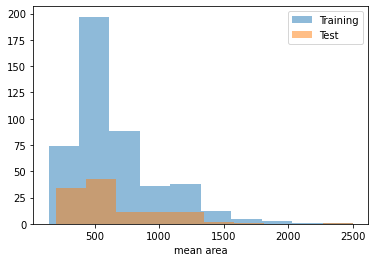

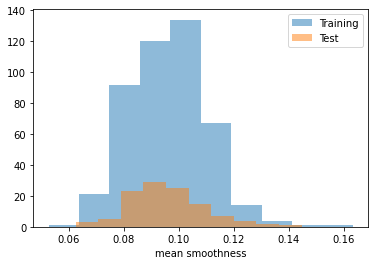

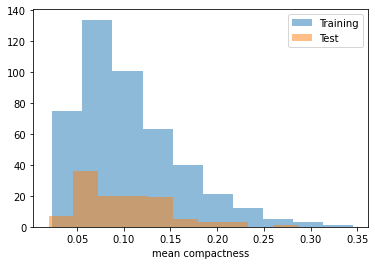

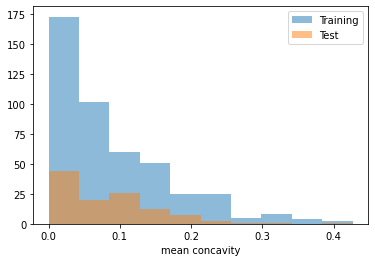

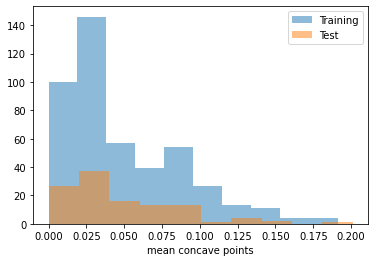

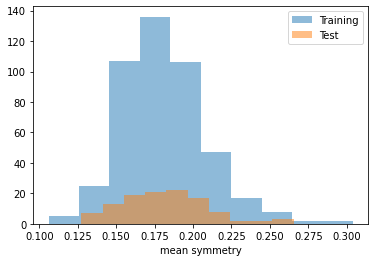

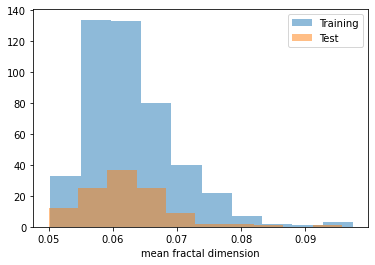

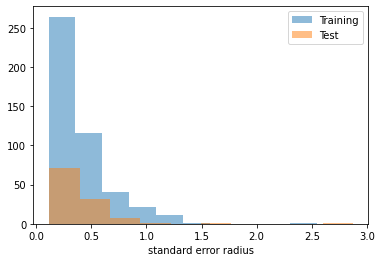

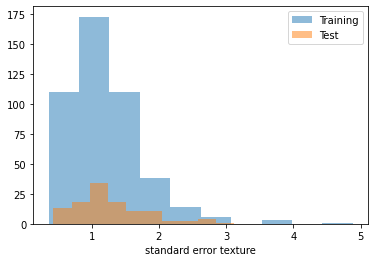

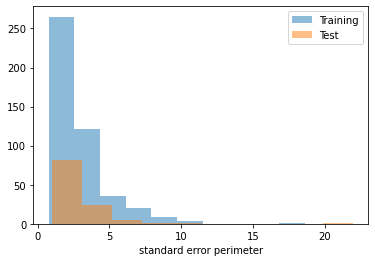

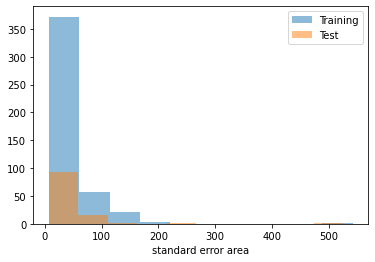

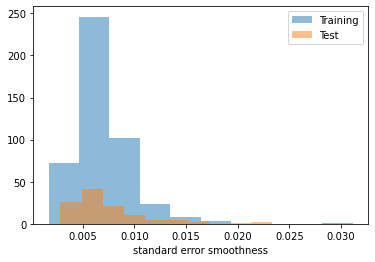

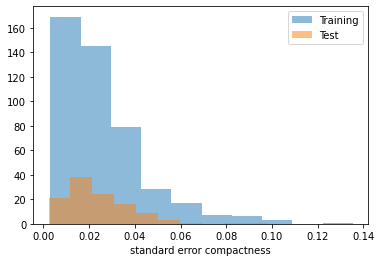

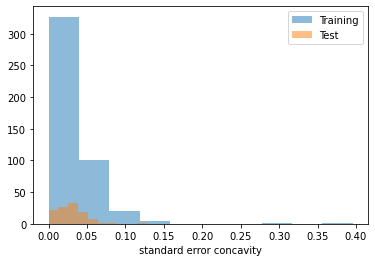

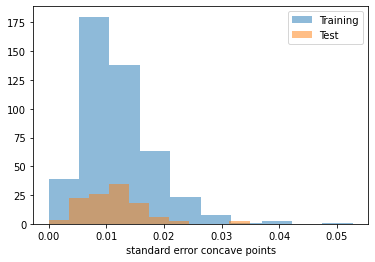

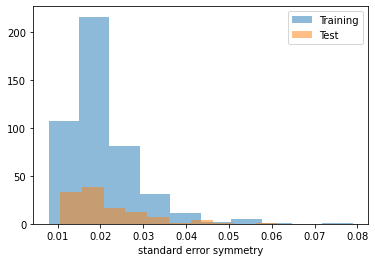

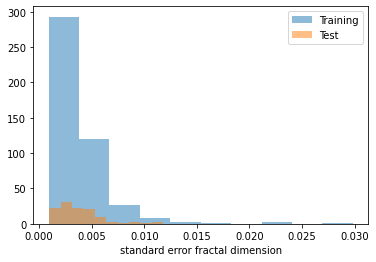

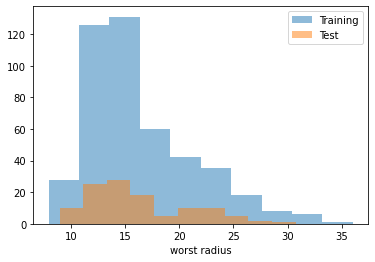

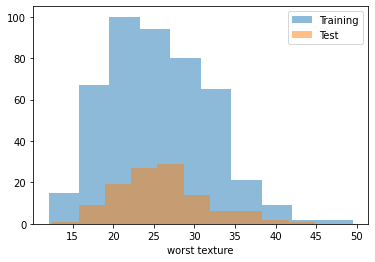

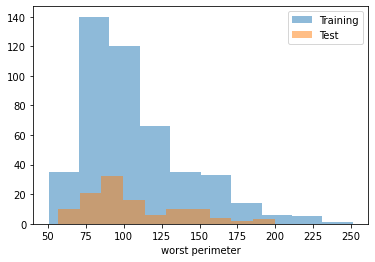

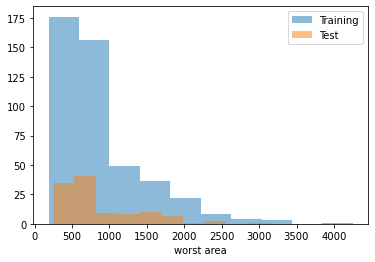

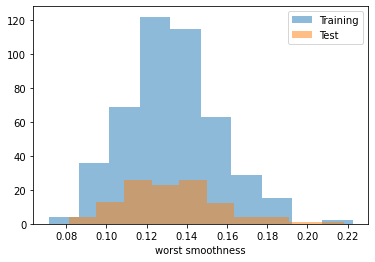

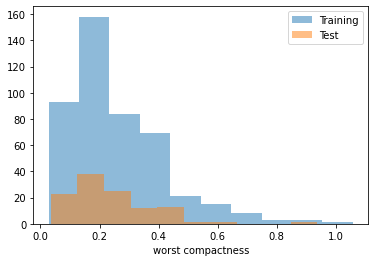

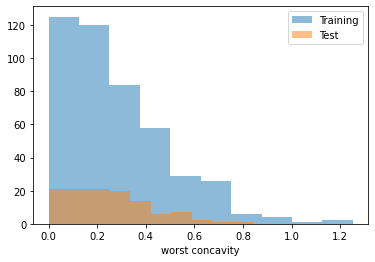

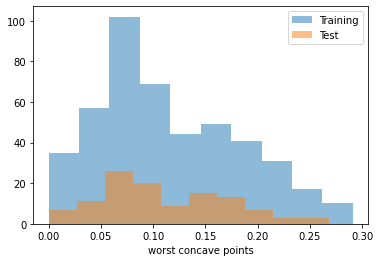

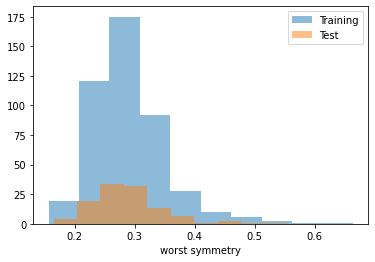

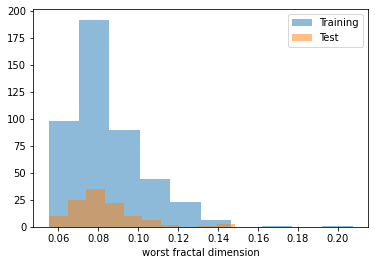

In [14]:
import matplotlib.pyplot as plt

# Loop through each feature in the DataFrame
for feature in X.columns:
  # Create a histogram for the training data
  plt.hist(training_data[feature], alpha=0.5, label="Training")
  # Create a histogram for the test data
  plt.hist(testing_data[feature], alpha=0.5, label="Test")
  # Add a legend
  plt.legend(loc="upper right")
  # Set the x-axis label
  plt.xlabel(feature)
  # Show the plot
  plt.show()

C:\Users\josep\AppData\Local\Temp\ipykernel_1340\2503290052.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots()


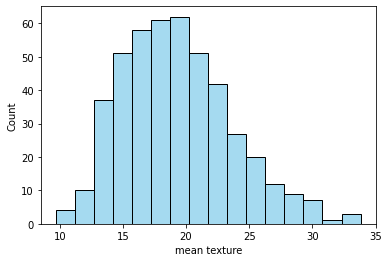

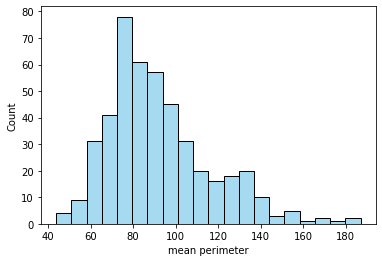

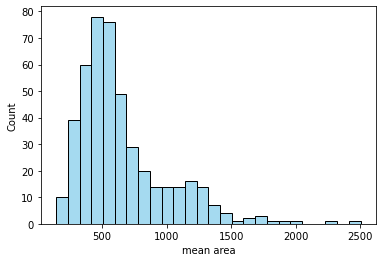

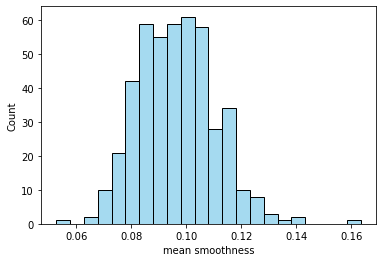

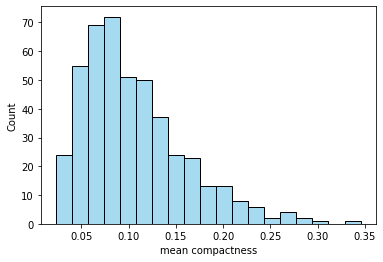

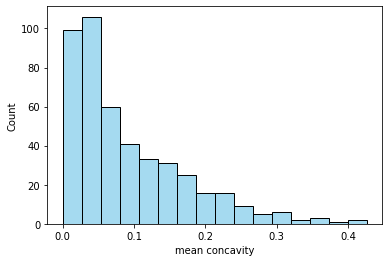

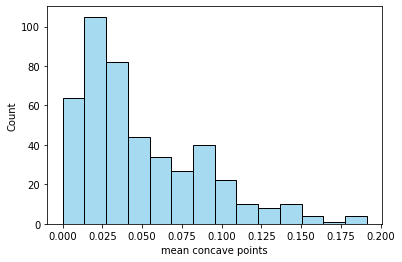

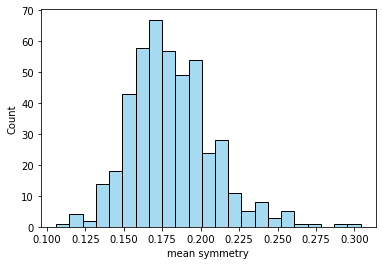

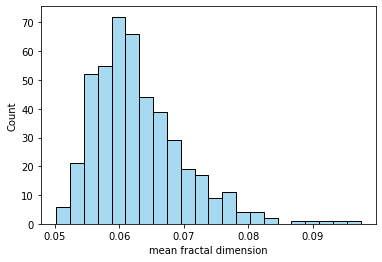

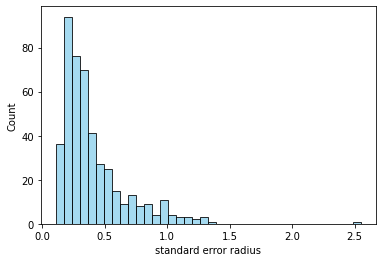

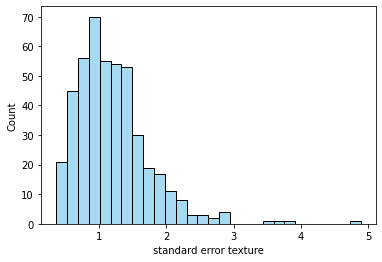

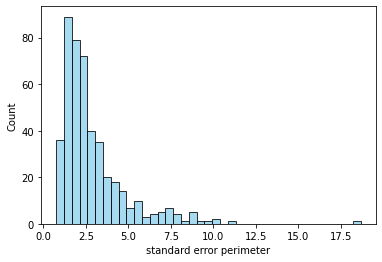

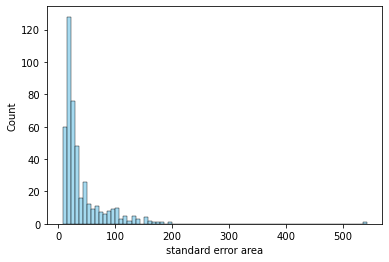

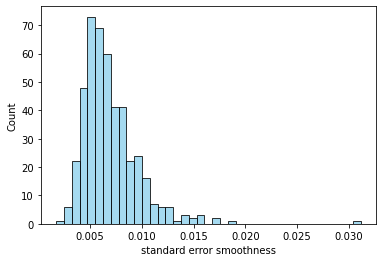

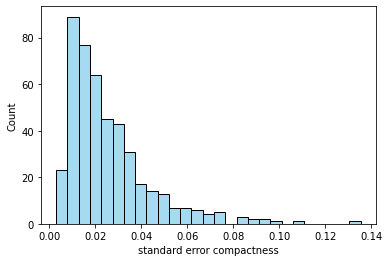

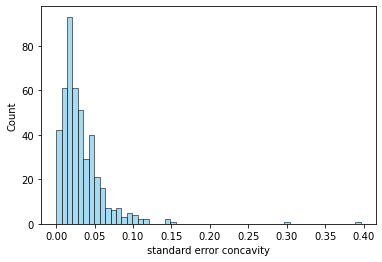

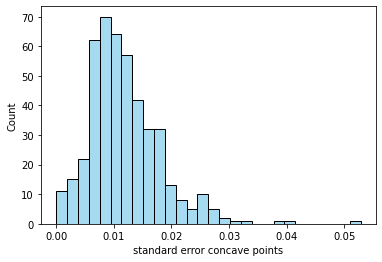

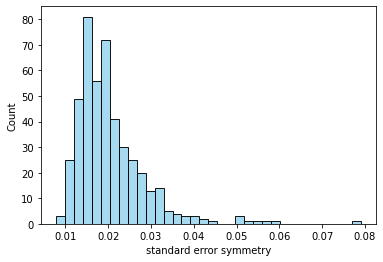

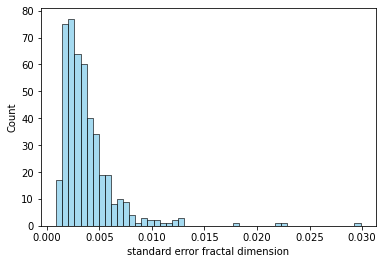

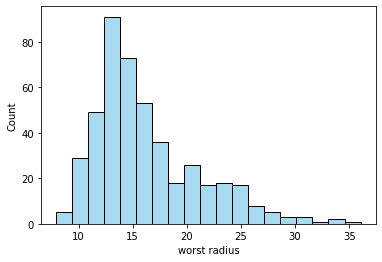

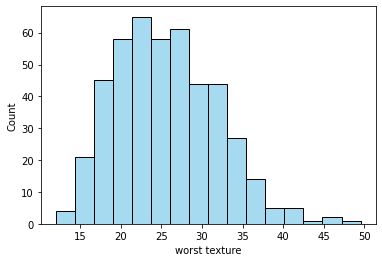

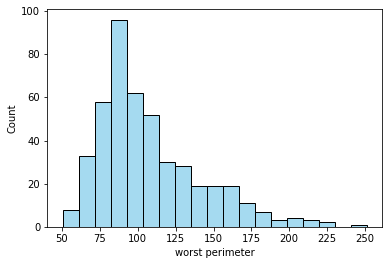

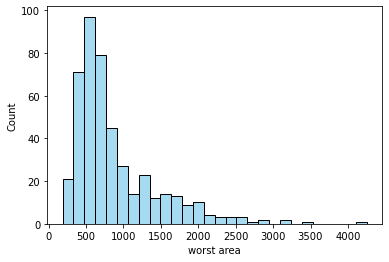

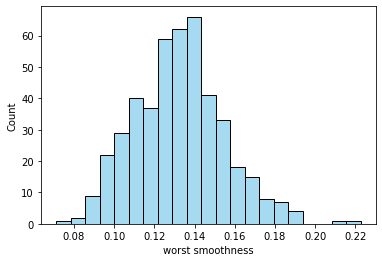

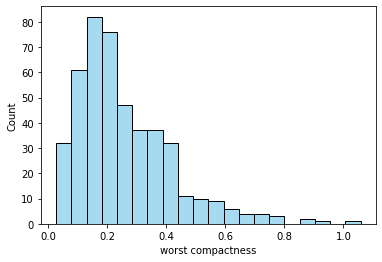

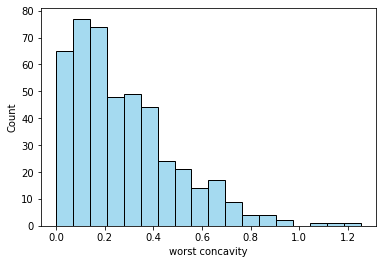

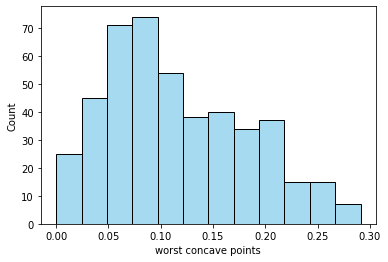

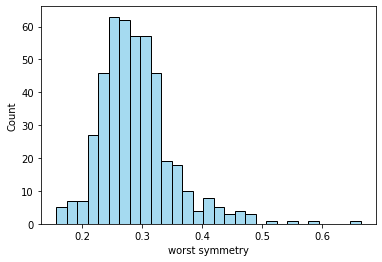

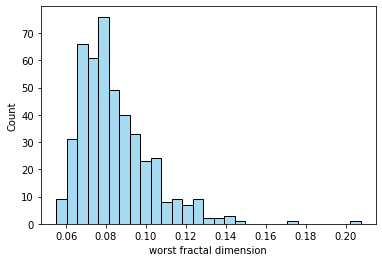

In [111]:
#quantile transformer
from sklearn.preprocessing import QuantileTransformer
from matplotlib import pyplot

scaler = QuantileTransformer(n_quantiles=100, output_distribution='normal')
#scaler = sklearn.preprocessing.StandardScaler()
#scaler = sklearn.preprocessing.MinMaxScaler()

X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns = attribute_names)
X_scaled_df = X
for attribute in X_scaled_df.columns[1:]:
    fig, ax = plt.subplots()
    sns.histplot(X_scaled_df.loc[:, attribute], ax=ax, color="skyblue")

In [53]:
def PCAShow(pca_X, y, pca = None):
    
    
    plt.scatter(pca_X[:,0], pca_X[:,1], c = y.values)
    plt.xlabel("pc1")
    plt.ylabel("pc2")
    plt.show()

    
    
    if(pca == None): #We only want to show the variance if this has been passed
        return
  
    eigen_ratio = pca.explained_variance_ratio_
    eigen_cum_sum = np.cumsum(eigen_ratio)
    #visualisation  
    #print(eigen_cum_sum)
    pca_names= []
    for i in range(len(eigen_ratio)):
        pca_names.append("pc" + str(i+1))
        
    def addlabels(x,y):
        for i in range(len(x)):
            plt.text(i, y[i], math.trunc(y[i] * 100) / 100, ha = 'center')
            


    fig = plt.figure(figsize =(10, 5))
    plt.ylim(0, 1)

    
    p1 = plt.bar(pca_names, eigen_ratio)
    p2 = plt.plot(pca_names, eigen_cum_sum, c = "red")
    plt.xlabel('Principle Component')

    plt.ylabel('Proportion of Explained Variance')


    addlabels(pca_names, eigen_cum_sum)
    plt.legend(title='Type', labels=['Cumulative', 'Individual'])
    plt.title("Variance ratio of principle components")


    plt.show()
    pca.explained_variance_


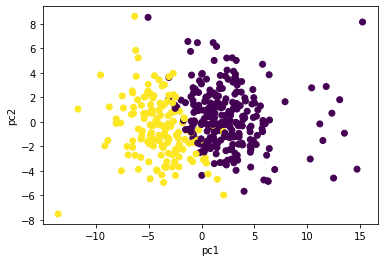

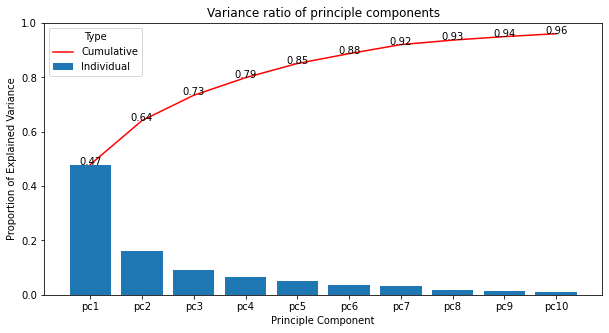

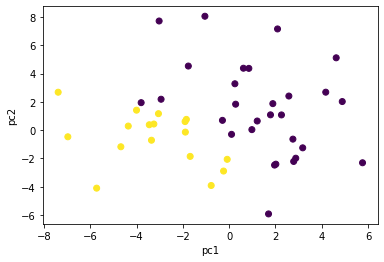

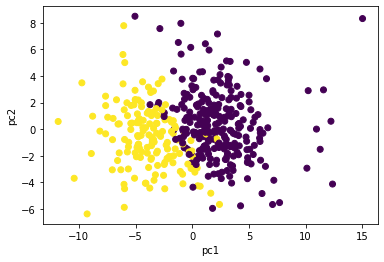

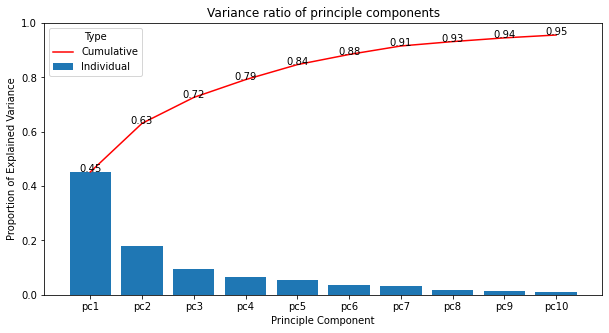

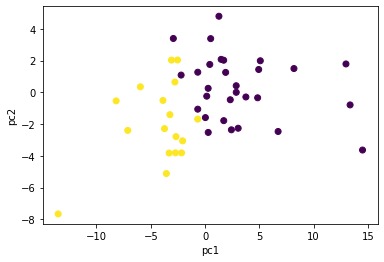

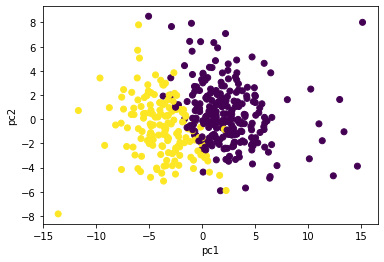

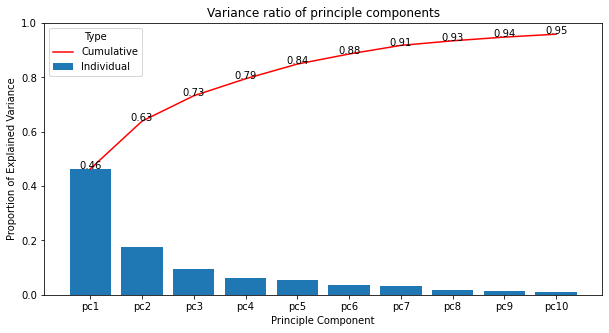

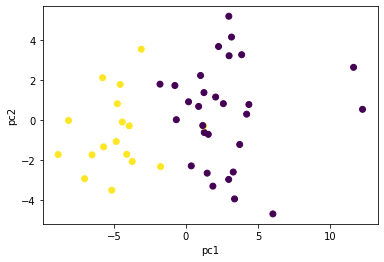

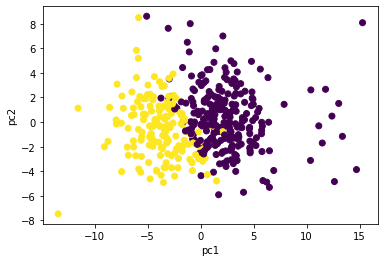

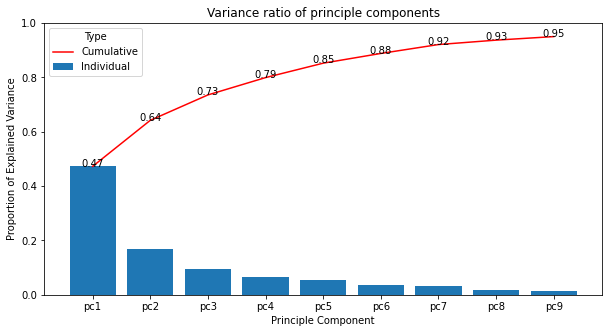

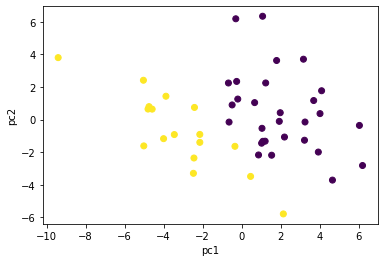

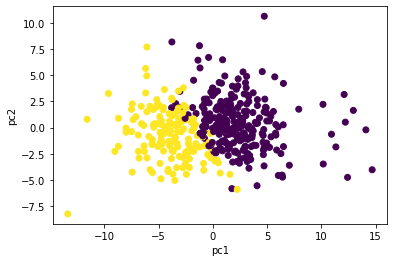

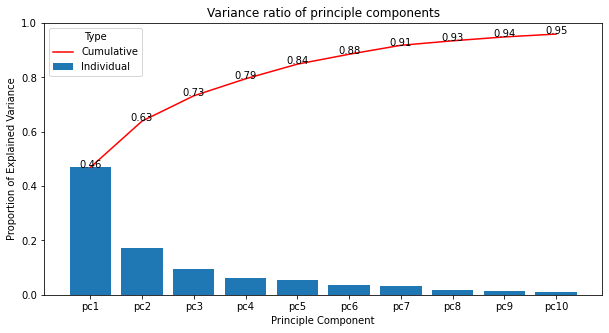

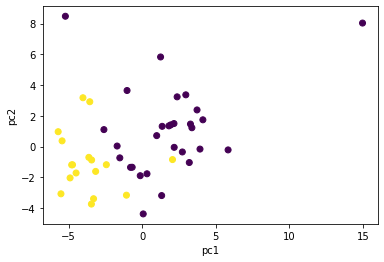

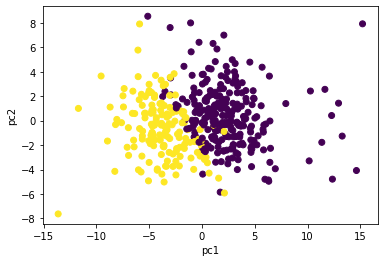

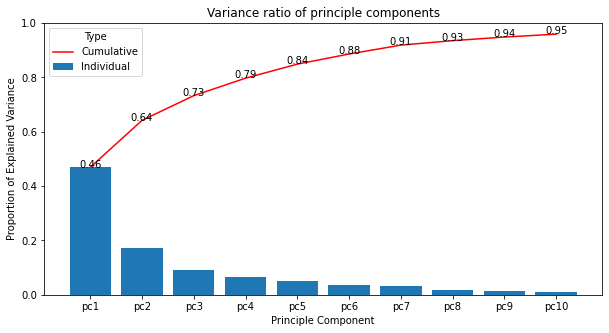

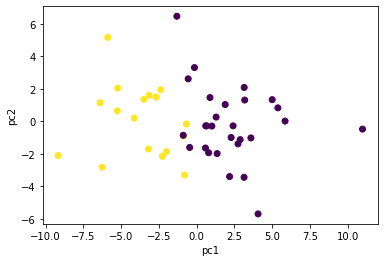

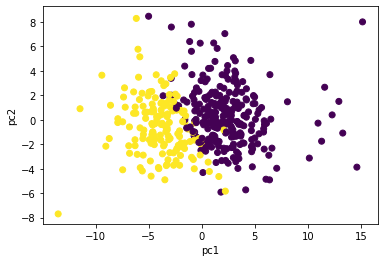

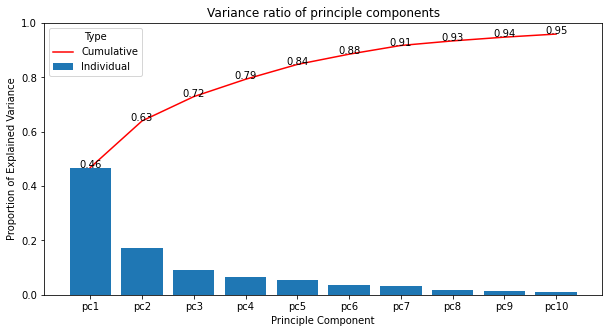

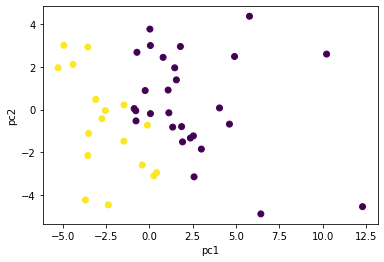

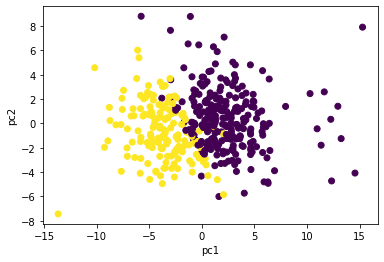

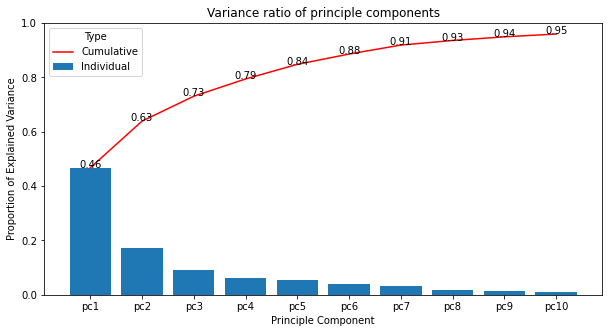

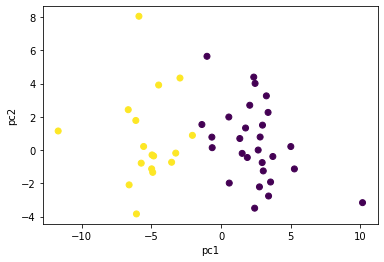

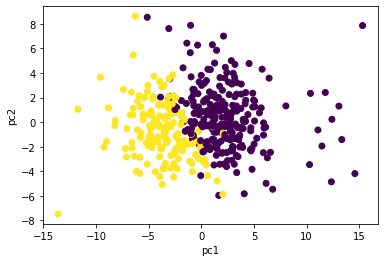

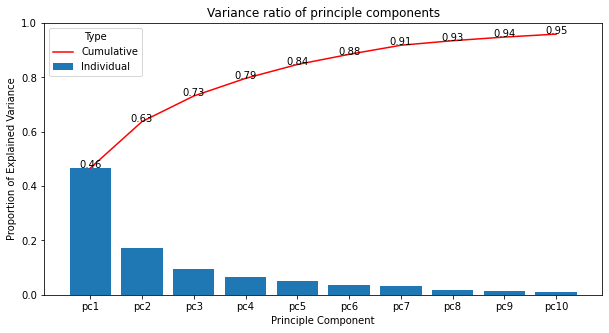

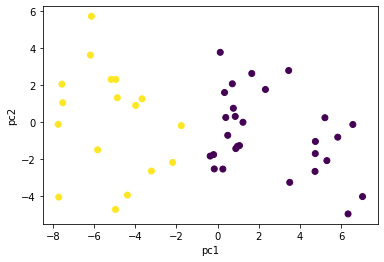

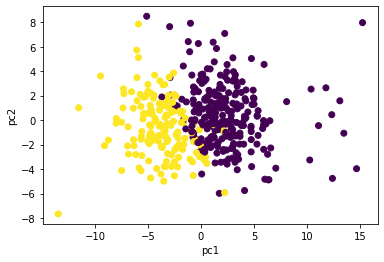

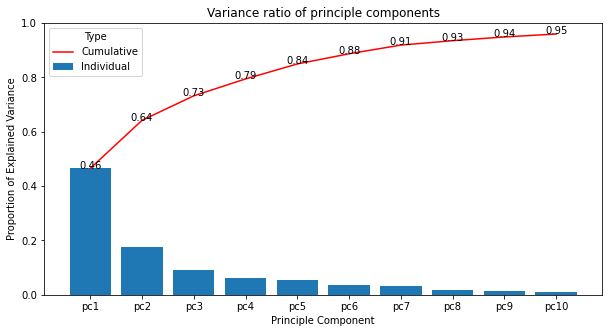

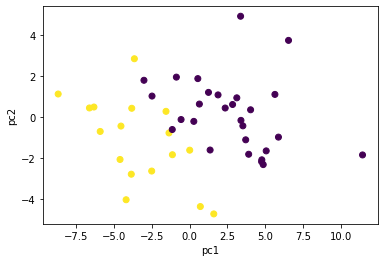

[0.9782608695652174, 0.9782608695652174, 0.9782608695652174, 0.9565217391304348, 0.9347826086956522, 0.9333333333333333, 1.0, 0.9777777777777777, 0.9777777777777777, 0.9555555555555556]
Accuracy 96.705 (2.028)


In [54]:
from sklearn.model_selection import StratifiedKFold
kf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1) #splits into 10 folds, shuffles and uses random seed 1


scaler = QuantileTransformer(n_quantiles=100, output_distribution='normal')
#scaler = sklearn.preprocessing.StandardScaler()
#scaler = MinMaxScaler()
log_regr = LogisticRegression()

scores = []
for train_index, test_index in kf.split(X, y):
    #print(train_index)
    train_X, test_X = X.loc[train_index], X.loc[test_index]
    train_y, test_y = y.loc[train_index], y.loc[test_index]
    X_train_scaled = scaler.fit_transform(train_X) #fit the scaler to the training data and scale it
    X_test_scaled = scaler.transform(test_X) #apply the scaler to the test data

    n_components = 0.95
    

    pca = decomposition.PCA(n_components) #I want to keep 0.95 of the varaiance from the principle components
    
    pca.fit(X_train_scaled) #fit the pca on the training data
    X_train_pca = pca.transform(X_train_scaled)
    PCAShow(X_train_pca, train_y, pca)

    
    X_test_pca = pca.transform(X_test_scaled) 
    PCAShow(X_test_pca, test_y)
    
    
    
    log_regr.fit(X_train_pca, train_y.values.ravel())
    scores.append(log_regr.score(X_test_pca, test_y))

print(scores)
print('Accuracy %.3f (%.3f)' % (mean(scores)*100, std(scores)*100))

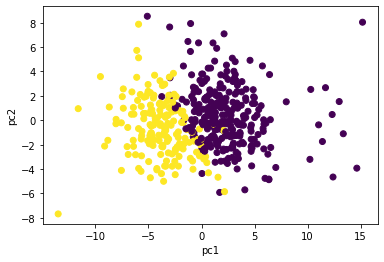

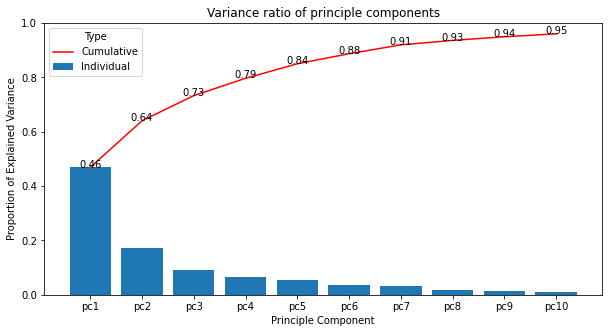

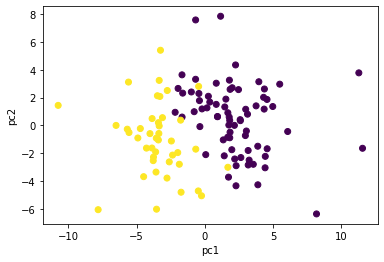

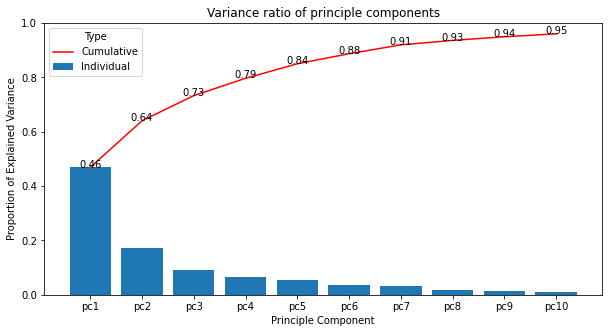

F2 measure: 0.957
Matthews correlation coefficient: 0.943


In [55]:
from sklearn.metrics import fbeta_score, matthews_corrcoef
n_components = 0.95

model = LogisticRegression()
scaler = QuantileTransformer(n_quantiles=100, output_distribution='normal')

#Declaring a PCA object, to keep the principle components comprising 0.95% of the variance
pca = decomposition.PCA(0.95) 

'''
TRAINING DATA PREPARATION

1.) Split the data into X and Y
2.) Fit a scaler to X and scale it
3.) Fit principle componenet analysis to X and transform it
4.) Show some figures relating to PCA on the training data

'''

#Splitting data into X and y
X_train = training_data[attribute_names]
y_train = training_data['diagnosis']


#Fitting a scaler and scaling X
X_train_scaled = scaler.fit_transform(X_train)



#Fit Principle Component Analysis to X and transform it
X_train_pca = pca.fit_transform(X_train_scaled)


model.fit(X_train_pca, y_train)

#Run a function that display PCA visually
PCAShow(X_train_pca, y_train, pca)


'''
TEST DATA PREPARATION

1.) Split test data into X and y
2.) Scale X using the already defined scaler 
3.) Transform X using the already defined transform


'''
    
X_test = testing_data[attribute_names]
y_test = testing_data['diagnosis']

X_test_scaled = scaler.transform(X_test) #scale the test data

X_test_pca = pca.transform(X_test_scaled) #transform it to a lower dimension
PCAShow(X_test_pca, y_test, pca)


y_pred = model.predict(X_test_pca)

f2 = fbeta_score(y_test, y_pred, beta=2) #F2 measure


mcc = matthews_corrcoef(y_test, y_pred) #matthews correlation coefficient

print(f"F2 measure: {f2:.3f}")
print(f"Matthews correlation coefficient: {mcc:.3f}")